In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import scipy
from scipy.stats import pearsonr
import sklearn
import sklearn.linear_model as lm
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()
df=pd.read_csv('df4_2.csv', index_col=0)

Saving df4_2.csv to df4_2 (2).csv


In [ ]:
df

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genotype  18 non-null     object 
 1   1_year    18 non-null     float64
 2   2_year    18 non-null     float64
 3   3_year    18 non-null     float64
dtypes: float64(3), object(1)
memory usage: 720.0+ bytes


In [ ]:
dfm = pd.melt(df, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
dfm.columns = ['Genotype', 'years', 'value']

In [ ]:
dfm

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94
5,B,1_year,4.02
6,C,1_year,3.99
7,C,1_year,3.30
8,C,1_year,4.41
9,D,1_year,3.75


In [ ]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Genotype  54 non-null     object 
 1   years     54 non-null     object 
 2   value     54 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


In [ ]:
dfm.groupby(['Genotype']).mean()

<ipython-input-7-d5e7b384631f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm.groupby(['Genotype']).mean()


,value
Genotype,
A,3.956667
B,5.996667
C,6.690000
D,6.516667
E,4.676667
F,6.530000


In [ ]:
dfm.groupby(['Genotype', 'years']).mean()

value
Genotype years        
A        1_year   1.58
         2_year   3.96
         3_year   6.33
B        1_year   3.52
         2_year   5.99
         3_year   8.48
C        1_year   3.90
         2_year   6.16
         3_year  10.01
D        1_year   3.65
         2_year   5.37
         3_year  10.53
E        1_year   1.92
         2_year   5.23
         3_year   6.88
F        1_year   4.46
         2_year   5.20
         3_year   9.93

<Axes: xlabel='Genotype', ylabel='value'>

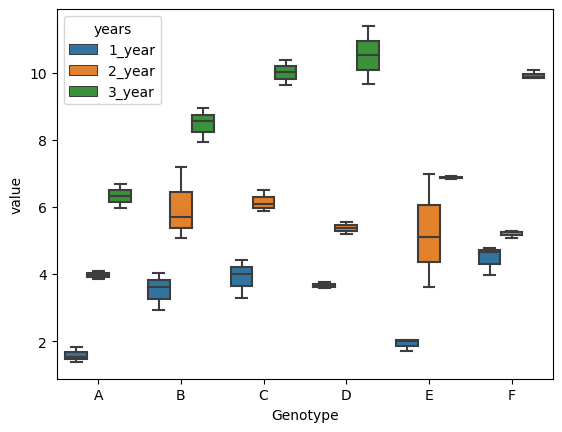

In [ ]:
sns.boxplot(x='Genotype', y='value', hue='years', data=dfm)

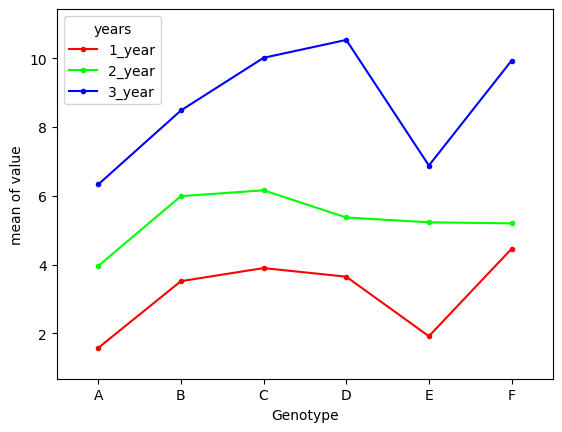

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(x=dfm['Genotype'], trace=dfm['years'], response=dfm['value'])
plt.show()

In [ ]:
from statsmodels.formula.api import ols
model = ols('value ~ Genotype + years+ Genotype:years',data=dfm).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Genotype,58.551733,5.0,32.748581,1.931655e-12
years,278.925633,2.0,390.014868,4.006243e-25
Genotype:years,17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
multiComp = MultiComparison(dfm['value'], dfm['Genotype'])
tukeyres = multiComp.tukeyhsd(alpha = 0.05)
print(tukeyres)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     2.04 0.5348 -1.5093 5.5893  False
     A      C   2.7333   0.22  -0.816 6.2827  False
     A      D     2.56 0.2846 -0.9893 6.1093  False
     A      E     0.72 0.9904 -2.8293 4.2693  False
     A      F   2.5733 0.2792  -0.976 6.1227  False
     B      C   0.6933 0.9919  -2.856 4.2427  False
     B      D     0.52 0.9979 -3.0293 4.0693  False
     B      E    -1.32 0.8774 -4.8693 2.2293  False
     B      F   0.5333 0.9976  -3.016 4.0827  False
     C      D  -0.1733    1.0 -3.7227  3.376  False
     C      E  -2.0133 0.5491 -5.5627  1.536  False
     C      F    -0.16    1.0 -3.7093 3.3893  False
     D      E    -1.84 0.6417 -5.3893 1.7093  False
     D      F   0.0133    1.0  -3.536 3.5627  False
     E      F   1.8533 0.6346  -1.696 5.4027  False
---------------------------------------------------


In [ ]:
multiComp = MultiComparison(dfm['value'], dfm['years'])
tukeyres = multiComp.tukeyhsd(alpha = 0.05)
print(tukeyres)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
1_year 2_year   2.1467   0.0 1.0864 3.2069   True
1_year 3_year   5.5217   0.0 4.4614 6.5819   True
2_year 3_year    3.375   0.0 2.3147 4.4353   True
-------------------------------------------------


In [ ]:
from google.colab import files
files.upload()
df=pd.read_csv('crop.data.csv')

Saving crop.data.csv to crop.data (4).csv


In [ ]:
df

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486
...,...,...,...,...
91,2,4,3,177.405292
92,1,1,3,178.141644
93,2,2,3,177.710613
94,1,3,3,177.687264


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   density     96 non-null     int64  
 1   block       96 non-null     int64  
 2   fertilizer  96 non-null     int64  
 3   yield       96 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 3.1 KB


In [ ]:
df.head(5)

,density,block,fertilizer,yield
0,1,1,1,177.228692
1,2,2,1,177.550041
2,1,3,1,176.408462
3,2,4,1,177.703625
4,1,1,1,177.125486


In [ ]:
dfm = pd.melt(df, id_vars=['yield'], value_vars=['density', 'block', 'fertilizer'])
dfm.columns = ['params', 'variables', 'value']

In [ ]:
dfm

,params,variables,value
0,177.228692,density,1
1,177.550041,density,2
2,176.408462,density,1
3,177.703625,density,2
4,177.125486,density,1
...,...,...,...
283,177.405292,fertilizer,3
284,178.141644,fertilizer,3
285,177.710613,fertilizer,3
286,177.687264,fertilizer,3


In [ ]:
from statsmodels.formula.api import ols
model = ols('params ~ variables + value+ params:value',data=dfm).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
variables,0.153853,2.0,0.990228,3.727753e-01
value,5.727257,1.0,73.723602,6.097961e-16
params:value,98.150435,1.0,1263.432592,2.273301e-106
Residual,21.985006,283.0,NaN,NaN


In [ ]:
multiComp = MultiComparison(dfm['params'], dfm['value'])
tukeyres = multiComp.tukeyhsd(alpha = 0.05)
print(tukeyres)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.3737 0.0002  0.1432 0.6042   True
     1      3   0.2877 0.0368  0.0122 0.5632   True
     1      4   0.3834 0.0441   0.007 0.7598   True
     2      3   -0.086 0.8514 -0.3615 0.1895  False
     2      4   0.0097 0.9999 -0.3667 0.3861  False
     3      4   0.0957  0.929 -0.3098 0.5012  False
---------------------------------------------------
